# Step 1: System Setup for ROS2 Iron on macOS

# Installing Xcode

In order to get ROS2 running, we need to install Xcode, which lets us work seamlessly with ROS2. Go to the macOS App Store, and search for Xcode:

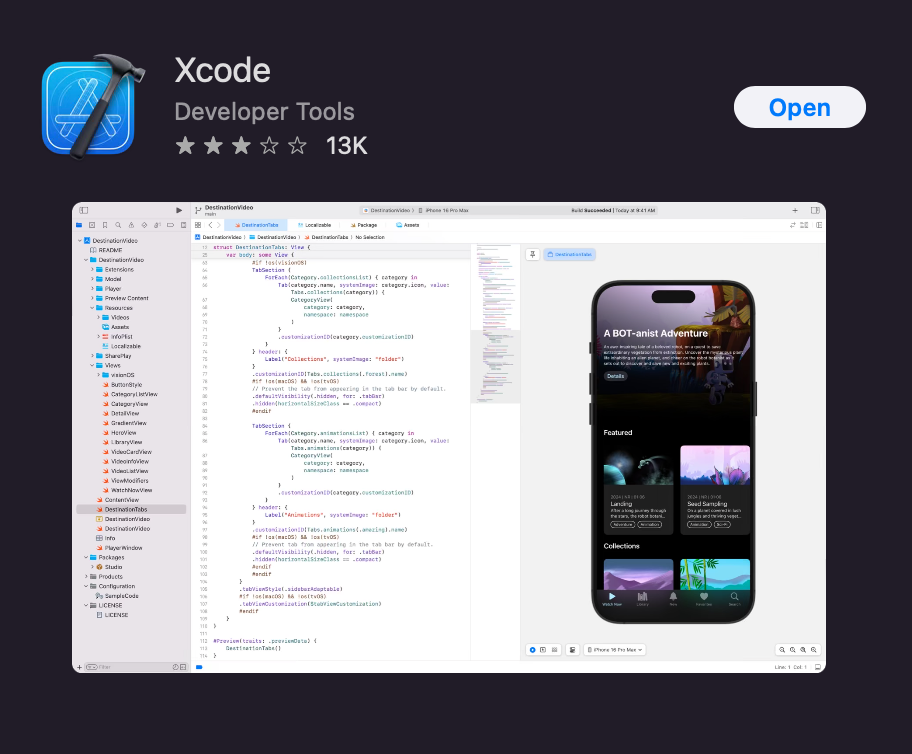

After hitting install, restart your MacBook and Xcode should now be fully functional!

Note: If you are unable to install Xcode, update your Mac to the newest software version and it should run properly

Next, run the following commands to get Xcode working:


```
xcode-select --install
```
This command will not succeed if you have not installed Xcode.app
```
sudo xcode-select --switch /Applications/Xcode.app/Contents/Developer
```
If you installed Xcode.app manually, you need to either open it or run:
```
sudo xcodebuild -license
```
To accept the Xcode.app license


# Installing Brew

Next, we need to install Brew. Brew is a useful Mac tool that lets us install dependencies with ease.
First, check if you already have Brew installed by opening a terminal and running:
```
brew help
```
If the brew menu comes up telling you how to run commands, you're all set. If not, then download it from [this link](http://brew.sh/).

After installing brew, go ahead and run the command:
```
brew doctor
```
This will make sure that brew is properly installed on your MacBook.

# Install Dependencies

To install the dependencies, go ahead and run the following brew command:
```
brew install asio assimp bison bullet cmake console_bridge cppcheck \
  cunit eigen freetype graphviz opencv openssl orocos-kdl pcre poco \
  pyqt@5 python qt@5 sip spdlog osrf/simulation/tinyxml1 tinyxml2
```
# Set Up Environment Variables

Add the openssl dir for DDS-Security

Note: if you are using BASH, then replace '.zshrc' with '.bashrc'
```
echo "export OPENSSL_ROOT_DIR=$(brew --prefix openssl)" >> ~/.zshrc
```
Add the Qt directory to the PATH and CMAKE_PREFIX_PATH
```
export CMAKE_PREFIX_PATH=$CMAKE_PREFIX_PATH:$(brew --prefix qt@5)
export PATH=$PATH:$(brew --prefix qt@5)/bin
```

Next we need to use Python3 to install more dependencies. First upgrade pip using python3:
```
python3 -m pip install --upgrade pip
```

And then run the following command:
```
python3 -m pip install -U \
  --config-settings="--global-option=build_ext" \
  --config-settings="--global-option=-I$(brew --prefix graphviz)/include/" \
  --config-settings="--global-option=-L$(brew --prefix graphviz)/lib/" \
  argcomplete catkin_pkg colcon-common-extensions coverage \
  cryptography empy flake8 flake8-blind-except==0.1.1 flake8-builtins \
  flake8-class-newline flake8-comprehensions flake8-deprecated \
  flake8-docstrings flake8-import-order flake8-quotes \
  importlib-metadata jsonschema lark==1.1.1 lxml matplotlib mock mypy==0.931 netifaces \
  nose pep8 psutil pydocstyle pydot pygraphviz pyparsing==2.4.7 \
  pytest-mock rosdep rosdistro setuptools==59.6.0 vcstool --break-system-packages --user
```

Note: Please make note of the use of `--break-system-packages` and `--user` which are necessary to run python pip within the terminal without issues.

# Disable SIP

The next step is to disable the built-in macOS System Integrity Protection. It is recommended that once you are done using ROS, to reenable this feature, but is necessary to disable when using ROS as it may interfere when inheriting dynamic linker environment variables, such as DYLD_LIBRARY_PATH.

To disable SIP, start by shutting down your MacBook. After shutting down, start it back up, and during the startup sequence, hold down `Command` + `R`. After the computer starts in recovery mode, select the "Utilities" menu at the upper left, and then open a terminal.

Within the terminal, enter the following command:
```
csrutil disable
```
and hit enter. Then restart your MacBook like normal. SIP should now be disabled.



# Get ROS 2 Code

(WARNING: This section is not completely tested due to some errors with the author's Python environment, proceed with caution)

First, you have to create a workspace, start by creating a directory and then entering that directory with the following commands:
```
mkdir -p ~/ros2_iron/src/
cd ~/ros2_iron
```
Then run the following command to import the ROS2 Code:
```
vcs import --input https://raw.githubusercontent.com/ros2/ros2/iron/ros2.repos src
```

(Note: the above command won't work with versions of Python newer than 3.11 due to a use of a function that is deprecated in newer versions)

# Build the code in the workspace

We will now use the colcon command to build everything. If you are not already in the ros2_iron directory, cd into it via `cd ~/ros2_iron/` and then run the following command:
```
colcon build --symlink-install --packages-skip-by-dep python_qt_binding
```

(Note, you may have to disable `python_qt_binding` at this point if there are issues with the build)

# Setting up and testing ROS 2

Next, we have to source the ROS 2 setup file via the following command:
```
. ~/ros2_iron/install/setup.zsh
```

Remember: every time you want to use ROS2, you have to source this file via the above command

To test if your implementation is working, open a terminal and run the following command:
```
ros2 run demo_nodes_cpp talker
```
And within a separate terminal, run the following command:
```
ros2 run demo_nodes_py listener
```

In the talker terminal, you should see messages popping up saying they are being broadcasted, and within the listener terminal, those messages should be recieved and displaying.

Congrats! ROS2 is now working on your MacBook!